In [1]:
from apy import *
from apy.amedia import *

opening /Users/abedavis/Code/MyRepos/python/apy-notebooks/notebooks/research/FGD


[464 444   3]


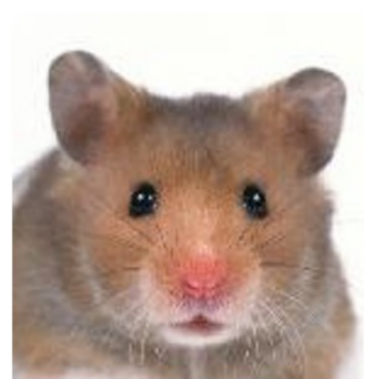

In [3]:
im = Image("./mouse.png").GetRGBCopy().GetFloatCopy()
im.show()
print(im.shape)

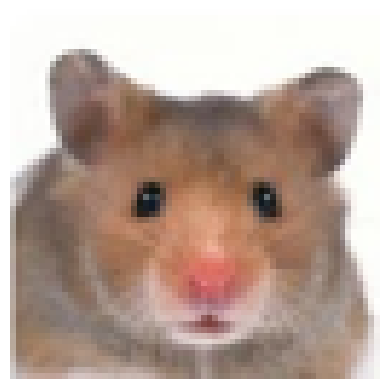

In [15]:
scaled = im.GetScaled([64,64]).GetFloatCopy();
scaled.show()

In [ ]:
64*64

In [32]:
mouse_cbm = acimops.bilateral.getCrossBilateralMatrix(scaled.fpixels, [1,1,0.1]);

In [33]:
mouse_cbm.shape

(4096, 4096)

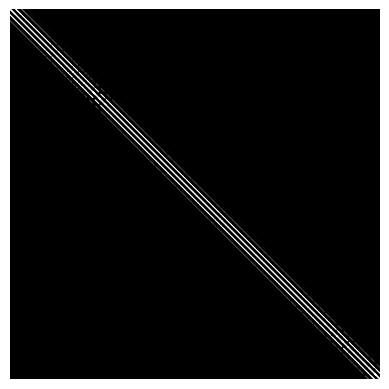

In [34]:
mcbmi = Image(pixels=mouse_cbm*100);
mcbmi.show()

In [35]:
mcbmi.writeToFile("./MouseCBM.png")

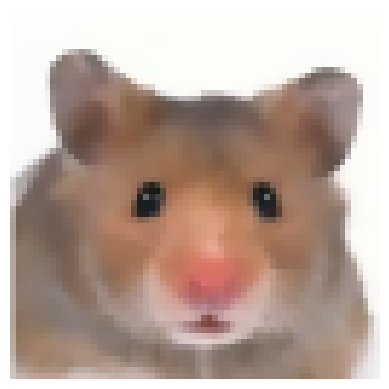

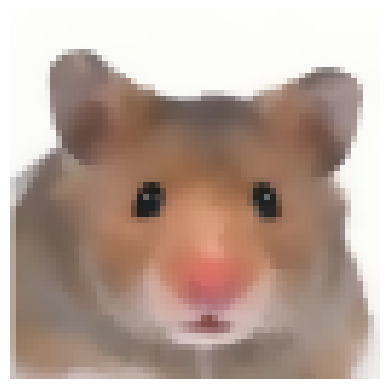

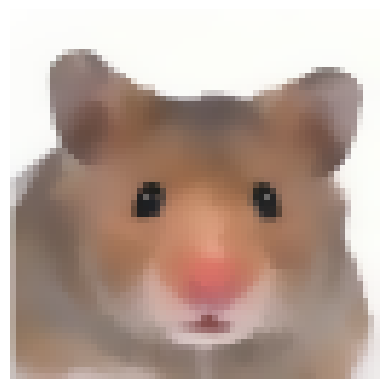

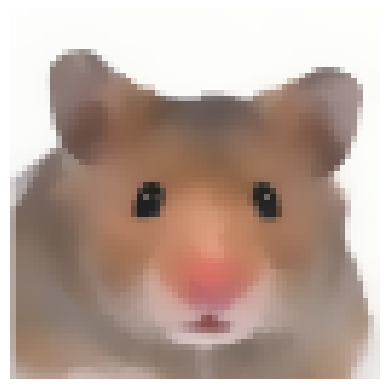

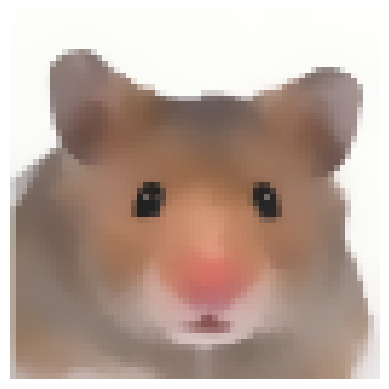

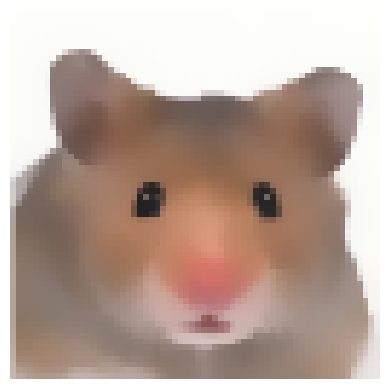

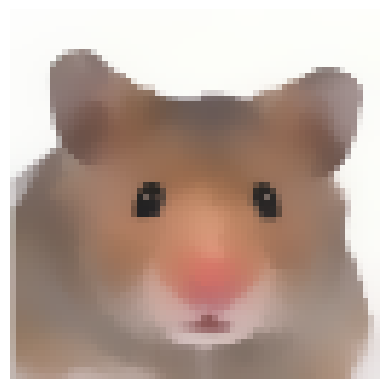

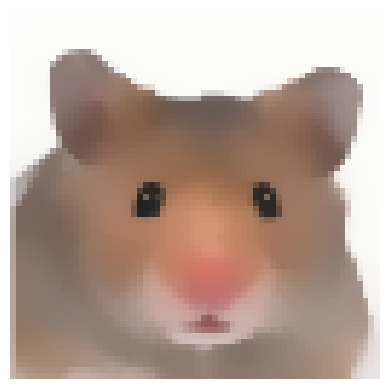

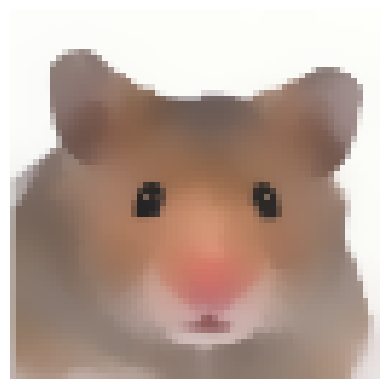

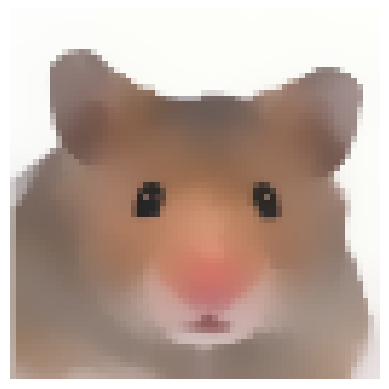

In [38]:
def mouse_cbl(image):
    rpix = np.reshape(image.pixels[:,:,0], 64*64);
    gpix = np.reshape(image.pixels[:,:,1], 64*64);
    bpix = np.reshape(image.pixels[:,:,2], 64*64);
    rpix_filtered = mouse_cbm@rpix;
    gpix_filtered = mouse_cbm@gpix;
    bpix_filtered = mouse_cbm@bpix;
    return Image(pixels=np.dstack([
        np.reshape(rpix_filtered, [64,64]),
        np.reshape(gpix_filtered, [64,64]),
        np.reshape(bpix_filtered, [64,64])]
    ));




current = scaled.clone();
filtered = [current];

for i in range(10):
    current = mouse_cbl(current);
    filtered.append(current);
    current.show()
    


# test = np.reshape(np.arange(100), [10,10])